In [95]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [96]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    return np.sqrt(np.sum((p - q)**2))

In [97]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    if _dist(p,q) <= eps:
        return True
    else:
        return False

In [98]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    for i in range(n_points):
        m_arr = np.squeeze(np.asarray(m))
        if _eps_neighborhood(m_arr[:,point_id],m_arr[:,i],eps) == True:
            seeds.append(i)
    return seeds

In [99]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    Neighbor=_region_query(m,point_id,eps)
    if len(Neighbor)<min_points:
        classifications[point_id]=NOISE
        return UNCLASSIFIED
    classifications[point_id]=cluster_id
    for point in Neighbor:
        classifications[point_id]=cluster_id
    while len(Neighbor)>0:
        current= Neighbor.pop(0)
        N_Neighbor=_region_query(m, current, eps)
        if len(N_Neighbor) >= min_points:
            for i in range(len(N_Neighbor)):
                N_Neighbor_pts = N_Neighbor[i]
                if classifications[N_Neighbor_pts] in [UNCLASSIFIED, None]:
                    if classifications[N_Neighbor_pts] == UNCLASSIFIED:
                        Neighbor.append(N_Neighbor_pts)
                    classifications[N_Neighbor_pts] = cluster_id
    return True

In [100]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    for point_id in range(n_points):
        if classifications[cluster_id]==UNCLASSIFIED:
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id+=1
    return classifications

In [101]:
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [102]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

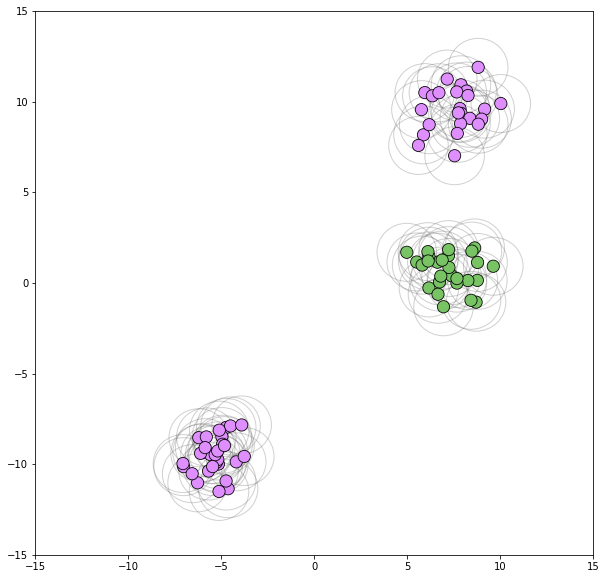

In [104]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [105]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [106]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

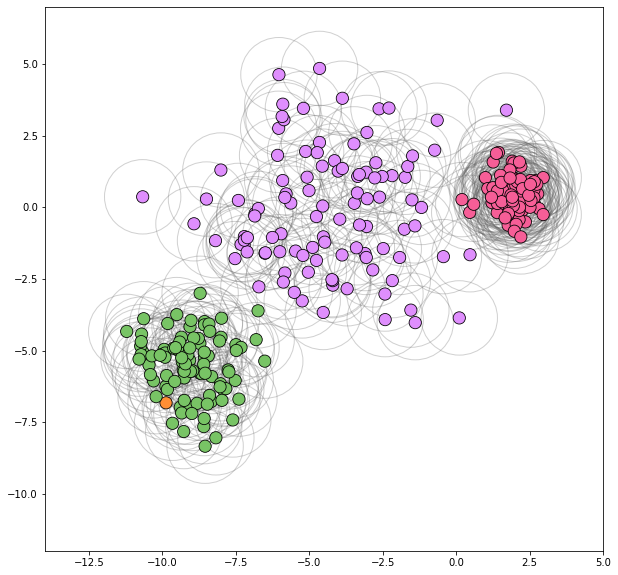

In [108]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)